In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline 

In [2]:
#импорт файла и считывание данных
heart_disease_data = pd.read_csv('/home/olga/Spring2019/ML/HeartDiseaseData.csv')

In [3]:
heart_disease_data.head()

,Unnamed: 0,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
1,2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
2,3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
3,4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
4,5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [4]:
#убираем незначащие параметры
heart_disease_data = heart_disease_data.drop(['Unnamed: 0', 'ID', 'Place'], axis=1)

In [5]:
#переменные переводим в dummies
heart_disease_data = pd.get_dummies(heart_disease_data)

In [6]:
heart_disease_data.shape

(457, 19)

In [7]:
heart_disease_data.dtypes

Age                                                                                                         int64
trestbps                                                                                                  float64
chol                                                                                                      float64
thalach                                                                                                   float64
oldpeak                                                                                                   float64
num                                                                                                         int64
Sex_female                                                                                                  uint8
Sex_male                                                                                                    uint8
cp_asymptomatic                                                                         

In [8]:
#переименовываем колонки
heart_disease_data = heart_disease_data.rename(columns = {'Sex_female': 'sex_female','Sex_male': 'sex_male', 
                                                          'cp_atypical angina': 'cp_atypical_angina', 
                                                          'cp_non-anginal pain':'cp_non_anginal_pain', 
                                                          'cp_typical angina': 'cp_typical_angina', 
                                                         'fbs_False': 'fbs_false', 
                                                         'fbs_True': 'fbs_true', 
                                                         'restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV': 'restecg_value1', 
                                                         'restecg_showing probable or definite left ventricular hypertrophy by Estes criteria': 'restecg_value2'})

In [9]:
#Разбиваем наш датафрейм на два, в переменную Х перемещаем все переменные, отвечающие за предсказание о переменной num,
#y - переменная num, которую нужно предсказать
X = heart_disease_data.drop('num', axis=1)
y = heart_disease_data.num

In [10]:
#проверяем наличие ропущенных значений в датафрейме
X.isnull().sum()

Age                     0
trestbps               33
chol                   26
thalach                33
oldpeak                36
sex_female              0
sex_male                0
cp_asymptomatic         0
cp_atypical_angina      0
cp_non_anginal_pain     0
cp_typical_angina       0
fbs_false               0
fbs_true                0
restecg_value1          0
restecg_normal          0
restecg_value2          0
exang_no                0
exang_yes               0
dtype: int64

In [11]:
#заменяем пропущенные значения на значение медианы
X = X.fillna({'trestbps': X.trestbps.median()})

In [12]:
X = X.fillna({'chol': X.chol.median()})

In [13]:
X = X.fillna({'thalach': X.thalach.median()})

In [14]:
X = X.fillna({'oldpeak': X.oldpeak.median()})

In [15]:
X.isnull().sum()

Age                    0
trestbps               0
chol                   0
thalach                0
oldpeak                0
sex_female             0
sex_male               0
cp_asymptomatic        0
cp_atypical_angina     0
cp_non_anginal_pain    0
cp_typical_angina      0
fbs_false              0
fbs_true               0
restecg_value1         0
restecg_normal         0
restecg_value2         0
exang_no               0
exang_yes              0
dtype: int64

In [ ]:
#Разбиваем наши данные на две части: тестовую и обучающую выборки и обучим дерево решений

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
#обучение дерева
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
clf.score(X_train, y_train)

1.0

In [20]:
clf.score(X_test, y_test)

0.6754966887417219

In [21]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [22]:
#визуализация
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

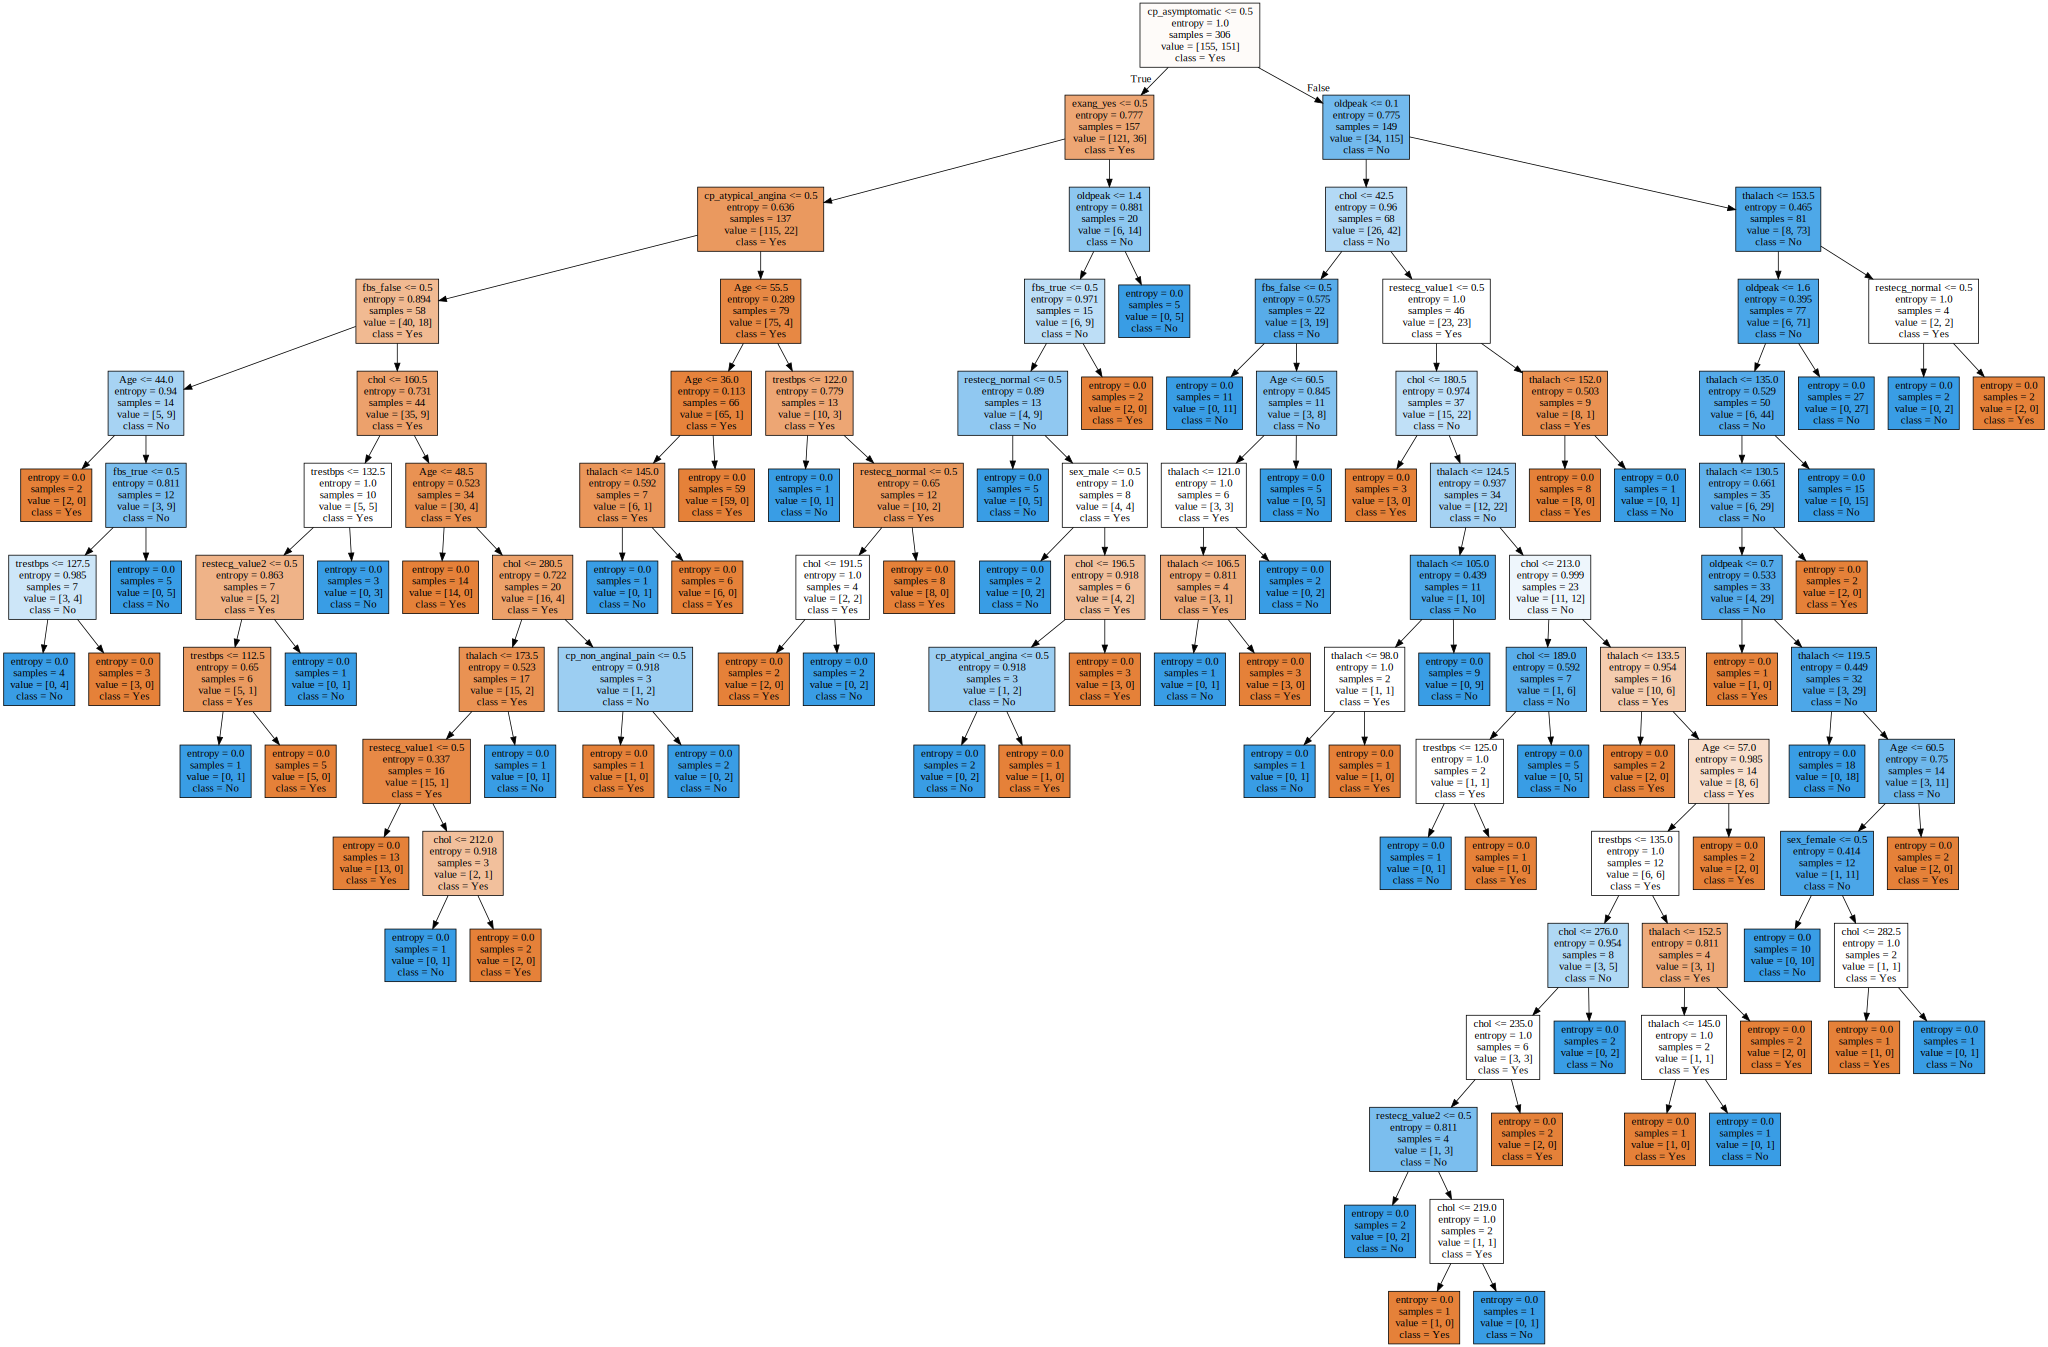

In [23]:
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=list(X), class_names=['Yes', 'No'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [ ]:
#разность между score_test и score_train - показатель того, как сильно переобучилось дерево. Для того,чтобы этого избежать
#зададим глубину дерева

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
clf.score(X_train, y_train)

0.7973856209150327

In [27]:
clf.score(X_test, y_test)

0.7284768211920529

In [28]:
#визуализация
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

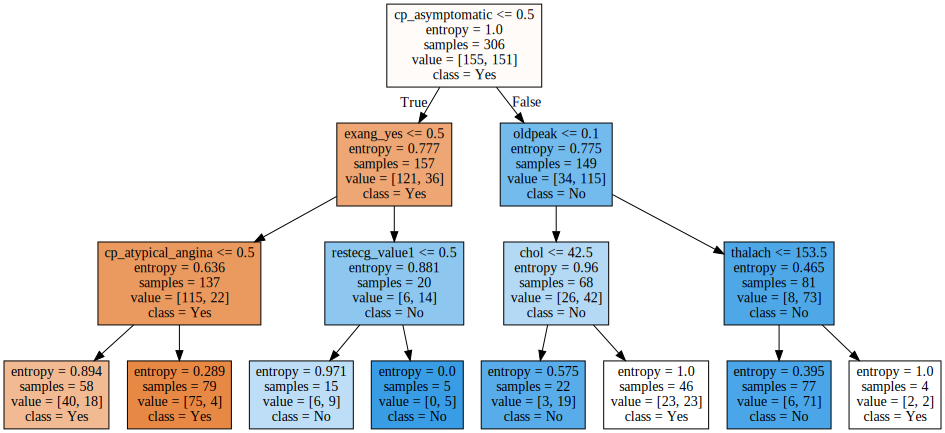

In [29]:
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=list(X), class_names=['Yes', 'No'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

In [ ]:
#по значению score стало чуть лучше, но хотелось бы понять, насколько правильно мы задали глубину дерева
#(возможно при другой глубине дерева оно обучится лучше)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')

In [32]:
cross_val_scores.mean()

0.7490555935292778

In [33]:
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()

In [34]:
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 'train_score': [train_score], 'max_dept': [max_dept]}))

In [35]:
classifier_score_data.head()

,test_score,train_score,max_dept
0,0.715232,0.771242,1
0,0.682119,0.797386,2
0,0.695364,0.813725,3
0,0.708609,0.843137,4
0,0.662252,0.869281,5


In [36]:
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')

In [37]:
classifier_score_data.head()

,max_dept,set_type,score
0,1,test_score,0.715232
1,2,test_score,0.682119
2,3,test_score,0.695364
3,4,test_score,0.708609
4,5,test_score,0.662252


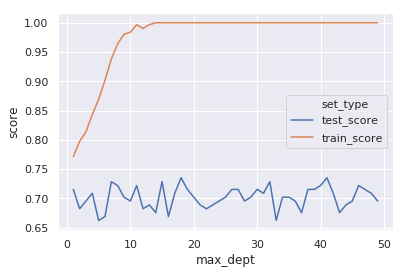

In [38]:
ax = sns.lineplot(x="max_dept", y="score",
                   hue="set_type", data=classifier_score_data)

In [ ]:
#но в данном случае мы обучили дерево по одной выборке. Сделаем теперь так, чтобы можно было посмотреть
#закономерность по всем тестам в зависимости от разных выборок. Для этого введем переменную mean_cross_val_score
#и добавим ее на график

In [47]:
cross_val_scores.mean()

0.7520185564922408

In [39]:
max_depth_values = range(1, 50)
classifier_score_data = pd.DataFrame()

In [40]:
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 'train_score': [train_score], 'max_dept': [max_dept], 'mean_cross_val_score': mean_cross_val_score}))

In [41]:
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')

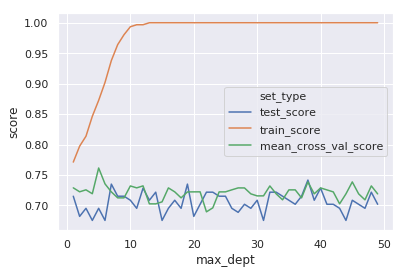

In [42]:
ax = sns.lineplot(x="max_dept", y="score",
                   hue="set_type", data=classifier_score_data)